In [207]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

articleDetails = pd.read_pickle('article_details.pkl')

In [208]:
# Remove article posted on 2015-01-03, because it has no details about vistors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2015-01-03"].index[0]])
# Remove article posted with the title of "Annual Seven-Up"
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Title'] == "Annual Seven-Up"].index[0]])
# Remove article posted on 2022-03-19, because it has no details about visitors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2022-03-19"].index[0]])

In [209]:
# Get visitor information: visitor count, visit count, page view count
def getVisitorNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("visitors", 1)[0])
    if pre_split_size != post_split_size:
        visitors = int(re.search(r'\d+', string.split("visitors", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        visitors = int(0)
    return visitors

def getVistTimesNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("times", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("times", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("visits", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("visits", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

def getPageViewNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("pages", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("pages", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("pageviews", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("pageviews", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

# Average weekly increase
def averageIncrease(df, col_name, int_in):
    # Create array of deltas. Replace nan and negative values with zero
    a = np.maximum(df[col_name] - df[col_name].shift(), 0).replace(np.nan, 0)
    # Count non-zero values
    count = np.count_nonzero(a)

    if count == 0:
        # If only zero values… there is no increase
        return 0
    else:
        if int_in == True:
            return int(np.sum(a) / count)
        elif int_in == False:
            return np.sum(a) / count
        else:
            print("Boolean value must be entered for whether the return should be an integer or not.")


def getVisitsPerVisitor(visits, visitors):
    return (visits / visitors)

def getPageViewsPerVisits(page_views, visits):
    return (page_views / visits)

def getPageViewsPerVisitor(page_views, visitor):
    return (page_views / visitor)

In [210]:
articleDetails['Visitors'] = articleDetails.apply(lambda row : getVisitorNumbers(row['Article Details']), axis = 1)
articleDetails['Visits'] = articleDetails.apply(lambda row : getVistTimesNumbers(row['Article Details']), axis = 1)
articleDetails['Page Visits'] = articleDetails.apply(lambda row : getPageViewNumbers(row['Article Details']), axis = 1)

# Remove article posted on 2010-11-06, because it has no details about visitors
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2010-11-06"].index[0]])

articleDetails['Visits per Visitor'] = articleDetails.apply(lambda row : getVisitsPerVisitor(row['Visits'], row['Visitors']), axis = 1)
articleDetails['Page Views per Visit'] = articleDetails.apply(lambda row : getPageViewsPerVisits(row['Page Visits'], row['Visits']), axis = 1)
articleDetails['Page Views per Visitor'] = articleDetails.apply(lambda row : getPageViewsPerVisitor(row['Page Visits'], row['Visitors']), axis = 1)

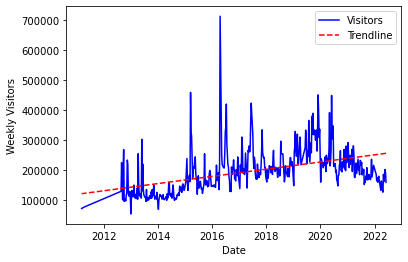

In [211]:
plt.plot(articleDetails['Date'], articleDetails['Visitors'], color='blue', label="Visitors")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visitors'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visitors")

plt.legend()
#plt.show()
plt.savefig('images/visitors.png',bbox_inches='tight')

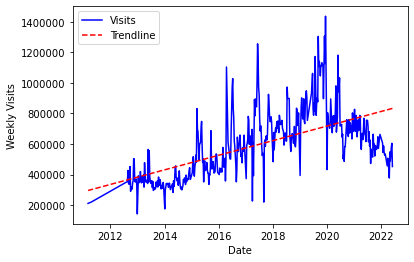

In [212]:
plt.plot(articleDetails['Date'], articleDetails['Visits'], color='blue', label="Visits")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visits'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visits")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/visits.png',bbox_inches='tight')

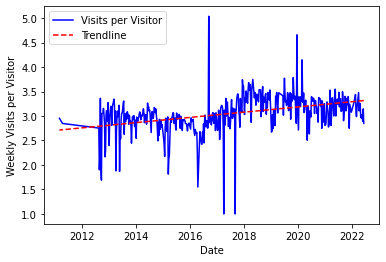

In [219]:
plt.plot(articleDetails['Date'], articleDetails['Visits per Visitor'], color='blue', label="Visits per Visitor")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visits per Visitor'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visits per Visitor")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.legend()
#plt.show()
plt.savefig('images/visits_per_visitor.png',bbox_inches='tight')

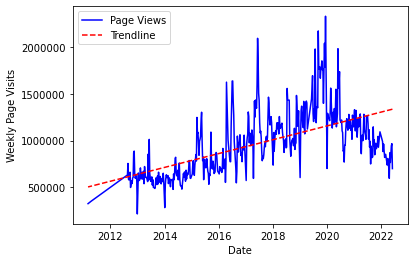

In [214]:
plt.plot(articleDetails['Date'], articleDetails['Page Visits'], color='blue', label="Page Views")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Page Visits'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Visits")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/page_views.png',bbox_inches='tight')

/tmp/ipykernel_46468/269409517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_limited['Date_num_new'] = date_limited['Date'].map(datetime.date.toordinal)


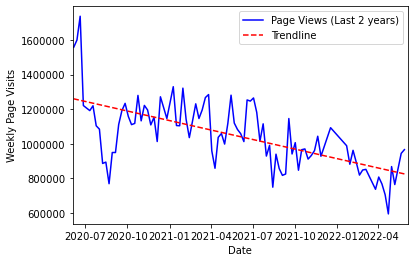

In [215]:
start_date = articleDetails['Date'][0].to_pydatetime() - relativedelta(years=2)
end_date = articleDetails['Date'][0].to_pydatetime()

date_limited = articleDetails[(articleDetails['Date'] > start_date) & (articleDetails['Date'] < end_date)]

plt.plot(date_limited['Date'], date_limited['Page Visits'], color='blue', label="Page Views (Last 2 years)")

# To perform the linear regression we need the dates to be numeric
date_limited['Date_num_new'] = date_limited['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(date_limited['Date_num_new'], date_limited['Page Visits'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(date_limited['Date'], p(date_limited['Date_num_new']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Visits")

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlim([start_date, end_date])

plt.legend()
#plt.show()
plt.savefig('images/page_views_last_two_years.png',bbox_inches='tight')

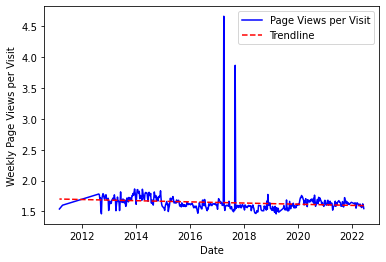

In [216]:
plt.plot(articleDetails['Date'], articleDetails['Page Views per Visit'], color='blue', label="Page Views per Visit")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Page Views per Visit'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Views per Visit")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.legend()
#plt.show()
plt.savefig('images/page_views_per_visit.png',bbox_inches='tight')

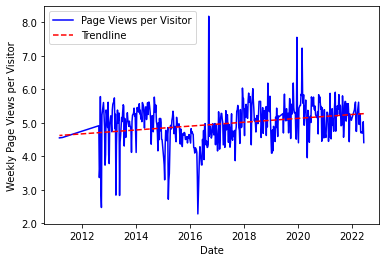

In [217]:
plt.plot(articleDetails['Date'], articleDetails['Page Views per Visitor'], color='blue', label="Page Views per Visitor")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Page Views per Visitor'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Page Views per Visitor")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.legend()
#plt.show()
plt.savefig('images/page_views_per_visitor.png',bbox_inches='tight')

In [218]:
print(averageIncrease(articleDetails, 'Visitors', True))
print(averageIncrease(articleDetails, 'Visits', True))
print(averageIncrease(articleDetails, 'Visits per Visitor', False))
print(averageIncrease(date_limited, 'Page Visits', True))

32835
75583
0.23483643898984496
109103
